<a href="https://colab.research.google.com/github/tabaahi07/Machine-Learning/blob/main/3.%20LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace HR_comma_sep.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
temp = df[df['Department'] == 'sales']
df['salary'].unique()
df['salary'] = df['salary'].map({'low':0 , 'medium':1 , 'high':2})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Department']) ;
df['Department'] = le.transform(df['Department'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,0
1,0.80,0.86,5,262,6,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,1
3,0.72,0.87,5,223,5,0,1,0,7,0
4,0.37,0.52,2,159,3,0,1,0,7,0


In [ ]:
temp['left'].sum()
df1 = df.groupby('Department').sum().reset_index()
df1.head()

,Department,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0,758.46,879.55,4683,248119,4256,164,273,3,701
1,1,487.80,560.44,3033,158030,2650,134,121,27,474
2,2,446.51,550.49,2934,154292,2702,96,204,14,483
3,3,442.52,523.84,2701,146828,2480,89,215,15,449
4,4,391.45,456.12,2432,126787,2711,103,91,69,675


<BarContainer object of 10 artists>

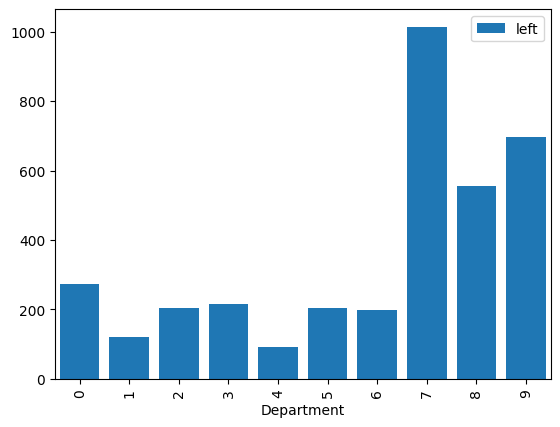

In [ ]:
import matplotlib.pyplot as plt
df1.plot.bar(x='Department' , y = 'left')
plt.bar(df1['Department'] , df1['left'])

In [ ]:
df2 = df.groupby('salary').sum().reset_index()
df2.head()

,salary,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0,4395.11,5245.70,27800,1470491,25154,1040,2172,66,43730
1,1,4008.23,4623.86,24582,1297827,22748,937,1317,181,37460
2,2,788.55,871.25,4660,247236,4568,192,82,72,6862


Text(0, 0.5, 'left count')

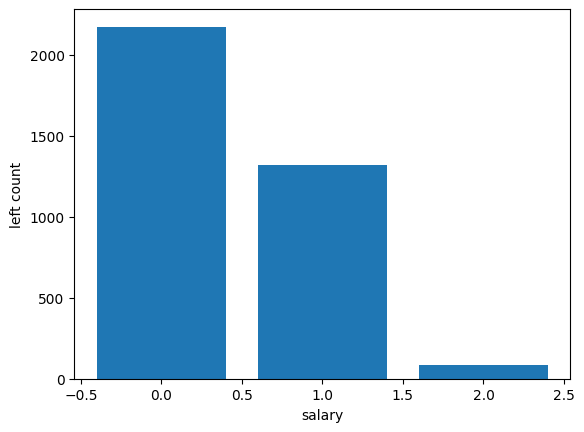

In [ ]:
plt.bar(df2['salary'] , df2['left'])
plt.xlabel('salary')
plt.ylabel('left count')

In [ ]:
X = df.drop('left',axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,0
1,0.80,0.86,5,262,6,0,0,7,1
2,0.11,0.88,7,272,4,0,0,7,1
3,0.72,0.87,5,223,5,0,0,7,0
4,0.37,0.52,2,159,3,0,0,7,0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X, df['left'], train_size=0.7)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain , ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(xtest,ytest)

0.8024444444444444